In [1]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [2]:
!pip install resampy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import IPython.display as ipd  #Ipython is used for playing audio directly in jupyter notebook.
import librosa
import librosa.display

In [5]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C65D-9667

 Directory of C:\Users\saika\OneDrive\Desktop\audio clssification

25-04-2024  00:05    <DIR>          .
24-04-2024  14:57    <DIR>          ..
24-04-2024  22:58    <DIR>          .ipynb_checkpoints
20-05-2014  00:32           177,956 4201-3-3-0.wav
20-05-2014  00:37           705,644 6508-9-0-4.wav
24-04-2024  22:55    <DIR>          audio
25-04-2024  00:05         1,449,700 Audio analysis.ipynb
24-04-2024  15:56    <DIR>          Audio-Classification
24-04-2024  22:55    <DIR>          metadata
24-04-2024  22:52    <DIR>          UrbanSound8K
               3 File(s)      2,333,300 bytes
               7 Dir(s)  328,105,099,264 bytes free


In [6]:
filename = '4201-3-3-0.wav'

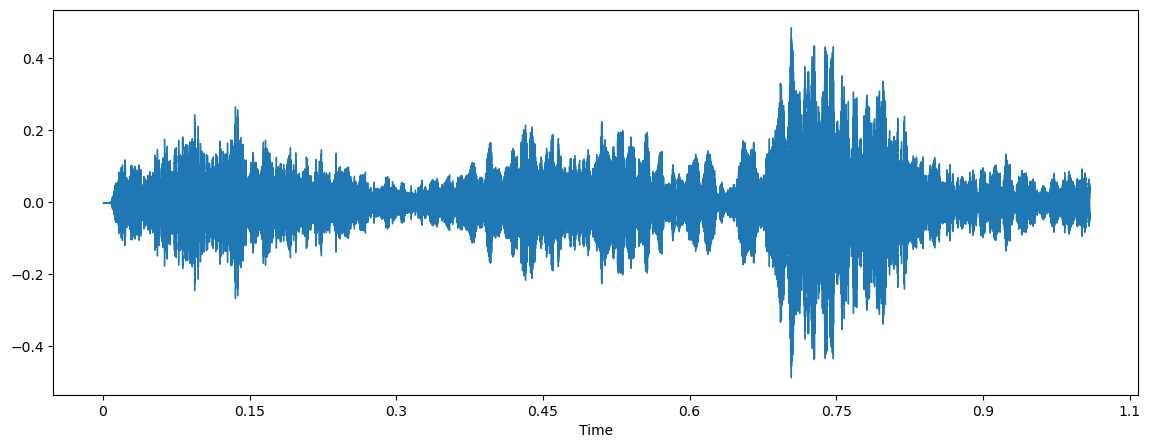

In [7]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)## use waveshow instead of wave plot
ipd.Audio(filename)

In [8]:
data #librosa gives normalise data which is in -1 to +1

array([-5.8207661e-09,  2.3283064e-10,  5.5879354e-09, ...,
        5.2534759e-02, -5.0471667e-03, -2.0513367e-02], dtype=float32)

In [9]:
sample_rate # A sample rate defines how many times per second a sound is sampled in a digital recording

22050

In [10]:
#it's a another way to access the audio data and sample rate
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [11]:
wave_sample_rate

44100

In [12]:
wave_audio #In this there are two channels

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [ -974, -1380],
       [-1644,  -124],
       [ -828,  1952]], dtype=int16)

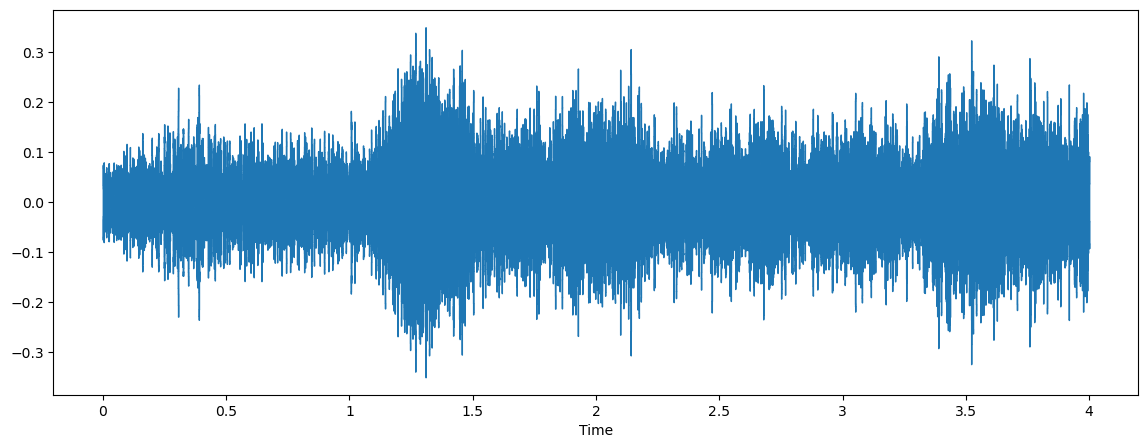

In [13]:
#check another audio
file_name='6508-9-0-4.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(file_name)
librosa.display.waveshow(data,sr=sample_rate)## use waveshow instead of wave plot
ipd.Audio(file_name)

In [14]:
librosa_audio_data=data

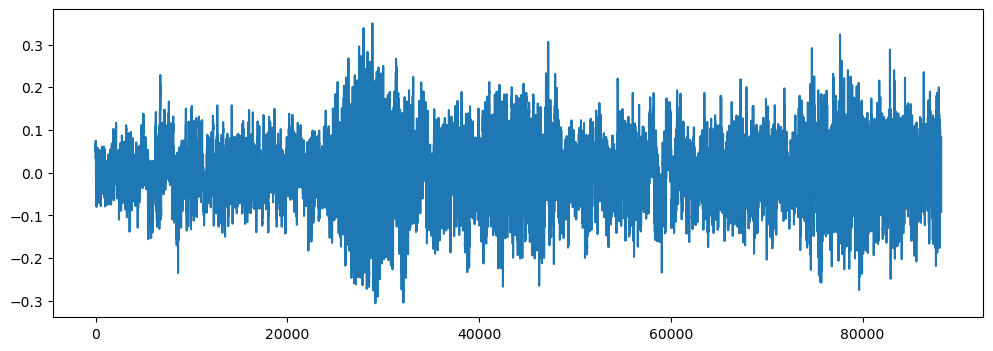

In [15]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### observation

- Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [16]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [17]:
wave_audio #the audio signal has only one channel

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [ -974, -1380],
       [-1644,  -124],
       [ -828,  1952]], dtype=int16)

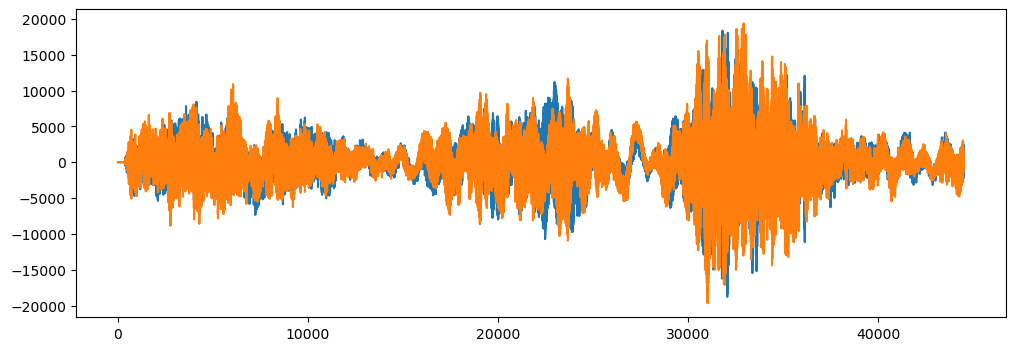

In [18]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features


Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification

In [19]:
librosa_sample_rate=sample_rate

In [20]:
#extract the required features
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape) #40 coefficients for each of the 173 frames

(40, 173)


In [21]:
mfccs

array([[-2.4288029e+02, -2.3276324e+02, -2.3539069e+02, ...,
        -1.9759674e+02, -1.7451219e+02, -1.7471001e+02],
       [ 1.2902484e+02,  1.4729956e+02,  1.5120630e+02, ...,
         1.9542905e+02,  1.8071280e+02,  1.4982678e+02],
       [-1.5620096e+01, -2.8936489e+01, -3.3458694e+01, ...,
        -3.1792503e+01, -2.4973904e+01, -3.7252636e+00],
       ...,
       [ 3.4022732e+00,  1.3701032e+00, -4.3529983e+00, ...,
        -4.7086034e+00, -5.4212084e+00, -6.8380156e+00],
       [ 1.3139293e-01,  9.5568252e-01,  4.7676377e+00, ...,
         1.4164397e+00, -1.8250973e+00, -5.9956484e+00],
       [-3.9868169e+00, -6.8021255e+00, -2.1495147e+00, ...,
        -3.4304392e+00, -6.1417389e+00, -5.8643956e+00]], dtype=float32)

In [22]:
import numpy as np

In [23]:
mfccs_scaled_features = np.mean(mfccs.T,axis=0)

In [24]:
mfccs_scaled_features  #40 features 

array([-2.0012039e+02,  1.6259750e+02, -2.6396303e+01,  5.4370434e+01,
       -1.2458646e+01,  1.9074177e+01, -7.2403374e+00,  5.5245404e+00,
       -7.8758564e+00,  5.1243563e+00,  4.4662561e+00, -3.0056915e+00,
        9.3444109e+00, -3.6863124e+00,  6.9111075e+00,  1.1561872e+00,
        4.4337578e+00,  2.5748780e+00,  3.2077165e+00,  5.0171628e+00,
       -8.6932355e-01,  2.6065072e-01, -1.9560521e+00,  2.2247996e+00,
       -3.5347576e+00, -3.3234438e-01, -4.9055924e+00, -1.4878511e+00,
        4.6849281e-01,  1.0163637e+00, -2.8642497e+00, -2.3646011e+00,
       -1.4518362e+00,  1.6319931e-01,  2.0843902e+00,  6.3359655e-02,
        2.7998865e+00, -1.7985222e+00, -1.3872391e+00, -4.1339865e+00],
      dtype=float32)

In [25]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='audio/'
metadata=pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


- when you specify res_type='kaiser_fast', librosa uses the Kaiser-windowed sinc function for        resampling the audio file, prioritizing speed while still maintaining reasonable quality.

In [26]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

- Its name stands for "taqaddum" in Arabic, which means progress. It's particularly useful when you     have loops or processes that take a significant amount of time to complete, as it gives you a visual   indication of the progress and estimated time remaining

In [27]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [10:44,  5.34it/s]C:\Users\saika\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [24:37,  7.82it/s]C:\Users\saika\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\saika\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [25:45,  5.65it/s]


In [28]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [29]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [32]:
X.shape

(8732, 40)

In [33]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [34]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [35]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459471e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

### Model Creation

In [41]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [43]:
### No of classes
num_labels=y.shape[1]

In [44]:
num_labels

10

In [45]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [46]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [47]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

- from tensorflow.keras.callbacks import ModelCheckpoint: This imports the ModelCheckpoint callback     from Keras, which allows us to save the model's weights during training.

- from datetime import datetime: This imports the datetime class from Python's standard library, which   is used for tracking the duration of the training process.

- In Keras, the verbose parameter is used to control the amount of information printed during the       training process.

In [48]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


217/219 [============================>.] - ETA: 0s - loss: 11.8575 - accuracy: 0.1168
Epoch 1: val_loss improved from inf to 2.29309, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 7ms/step - loss: 11.8069 - accuracy: 0.1165 - val_loss: 2.2931 - val_accuracy: 0.1133
Epoch 2/100
 25/219 [==>...........................] - ETA: 0s - loss: 2.8119 - accuracy: 0.1350

C:\Users\saika\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


216/219 [============================>.] - ETA: 0s - loss: 2.5315 - accuracy: 0.1186
Epoch 2: val_loss improved from 2.29309 to 2.28264, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5310 - accuracy: 0.1183 - val_loss: 2.2826 - val_accuracy: 0.1162
Epoch 3/100
214/219 [============================>.] - ETA: 0s - loss: 2.3501 - accuracy: 0.1154
Epoch 3: val_loss improved from 2.28264 to 2.27410, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3498 - accuracy: 0.1155 - val_loss: 2.2741 - val_accuracy: 0.1151
Epoch 4/100
205/219 [===========================>..] - ETA: 0s - loss: 2.2901 - accuracy: 0.1148
Epoch 4: val_loss improved from 2.27410 to 2.25496, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.2870 - accuracy: 0.1158 - val_loss: 2.2550 - val_accuracy: 0.1528
Epoch 5

219/219 [==============================] - 1s 4ms/step - loss: 1.5297 - accuracy: 0.4511 - val_loss: 1.3547 - val_accuracy: 0.5415
Epoch 27/100
205/219 [===========================>..] - ETA: 0s - loss: 1.5062 - accuracy: 0.4666
Epoch 27: val_loss improved from 1.34312 to 1.30613, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.5100 - accuracy: 0.4657 - val_loss: 1.3061 - val_accuracy: 0.5793
Epoch 28/100
208/219 [===========================>..] - ETA: 0s - loss: 1.4647 - accuracy: 0.4806
Epoch 28: val_loss improved from 1.30613 to 1.27497, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4676 - accuracy: 0.4790 - val_loss: 1.2750 - val_accuracy: 0.5793
Epoch 29/100
211/219 [===========================>..] - ETA: 0s - loss: 1.4478 - accuracy: 0.4926
Epoch 29: val_loss improved from 1.27497 to 1.23640, saving model to saved_models\audio_classific

219/219 [==============================] - 1s 5ms/step - loss: 1.1517 - accuracy: 0.6147 - val_loss: 0.9567 - val_accuracy: 0.6949
Epoch 53/100
219/219 [==============================] - ETA: 0s - loss: 1.1237 - accuracy: 0.6213
Epoch 53: val_loss improved from 0.95669 to 0.94720, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.1237 - accuracy: 0.6213 - val_loss: 0.9472 - val_accuracy: 0.6943
Epoch 54/100
213/219 [============================>.] - ETA: 0s - loss: 1.1316 - accuracy: 0.6199
Epoch 54: val_loss did not improve from 0.94720
219/219 [==============================] - 1s 4ms/step - loss: 1.1278 - accuracy: 0.6205 - val_loss: 0.9594 - val_accuracy: 0.6892
Epoch 55/100
215/219 [============================>.] - ETA: 0s - loss: 1.1245 - accuracy: 0.6144
Epoch 55: val_loss did not improve from 0.94720
219/219 [==============================] - 1s 5ms/step - loss: 1.1241 - accuracy: 0.6152 - val_loss: 0.9590 -

215/219 [============================>.] - ETA: 0s - loss: 1.0230 - accuracy: 0.6532
Epoch 80: val_loss improved from 0.85027 to 0.83142, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.0205 - accuracy: 0.6541 - val_loss: 0.8314 - val_accuracy: 0.7499
Epoch 81/100
212/219 [============================>.] - ETA: 0s - loss: 1.0324 - accuracy: 0.6565
Epoch 81: val_loss did not improve from 0.83142
219/219 [==============================] - 1s 5ms/step - loss: 1.0329 - accuracy: 0.6564 - val_loss: 0.8537 - val_accuracy: 0.7218
Epoch 82/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0190 - accuracy: 0.6580
Epoch 82: val_loss did not improve from 0.83142
219/219 [==============================] - 1s 5ms/step - loss: 1.0168 - accuracy: 0.6587 - val_loss: 0.8531 - val_accuracy: 0.7350
Epoch 83/100
202/219 [==========================>...] - ETA: 0s - loss: 1.0336 - accuracy: 0.6583
Epoch 83: val_loss did n

#### observations:

- Training completed in time:  0:01:48.032294
- validation accuracy=0.75
- accuracy=0.66

In [49]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7538637518882751


In [52]:
# Get raw predictions from the model
raw_predictions = model.predict(X_test)

# Apply post-processing to obtain the predicted classes
predicted_classes = np.argmax(raw_predictions, axis=1)

55/55 [==============================] - 0s 3ms/step


In [53]:
predicted_classes

array([5, 3, 4, ..., 1, 2, 5], dtype=int64)

In [55]:
### Testing with Some audio
file_name='4201-3-3-0.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
raw_predictions = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(raw_predictions, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-213.7971       64.23698      -6.0220165    37.139004    -25.384119
   18.16741       6.50859      26.980846    -20.586294     30.421587
  -17.476885     17.081646      2.6450064    20.440067     -4.1738925
   21.698235      8.089776     12.887669     -2.2336729    11.576321
   -4.4316406     8.235312      7.398303     -0.75833416    3.9301653
   -1.8740101    -0.40884572    0.7132931     9.6993065     4.033182
   -6.0885344    13.198737     -5.706773      9.076355     -0.87206936
    5.2835593    -3.5514174     5.425924      2.1562452    -5.3348207 ]
[[-213.7971       64.23698      -6.0220165    37.139004    -25.384119
    18.16741       6.50859      26.980846    -20.586294     30.421587
   -17.476885     17.081646      2.6450064    20.440067     -4.1738925
    21.698235      8.089776     12.887669     -2.2336729    11.576321
    -4.4316406     8.235312      7.398303     -0.75833416    3.9301653
    -1.8740101    -0.40884572    0.7132931     9.6993065     4.033182
    -6.0885344    1

array(['dog_bark'], dtype='<U16')